In [ ]:
!kaggle datasets download -d aminghias/targeted-marketing --unzip

Dataset URL: https://www.kaggle.com/datasets/aminghias/targeted-marketing
License(s): CC0-1.0
 96% 305M/319M [00:02<00:00, 90.1MB/s]
100% 319M/319M [00:02<00:00, 115MB/s] 


### Importing core libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random

### Loading datasets

In [ ]:
df = pd.read_csv('/content/df_classes.csv')

In [ ]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'treatment', 'conversion', 'visit', 'exposure', 'class'],
      dtype='object')

In [ ]:
df.shape

(13979592, 17)

The data has over `13 million` rows, which is more than my PC can handle. I'll reduce it down to `10,000`

In [ ]:
sub_ind = random.sample(list(df.index), 10000)

In [ ]:
df_small = df.iloc[sub_ind]

In [ ]:
df_small.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
864817,26.100680,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
6571533,15.996813,10.059654,8.990387,1.267425,10.280525,4.115453,-11.299958,4.833815,3.821584,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2373767,24.357348,10.059654,8.214383,4.679882,10.280525,4.115453,-3.993764,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
9394818,12.616365,10.059654,8.442752,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,18.380112,5.300375,-0.168679,1,0,0,0,Lost Cause
7230614,16.991144,10.059654,8.310828,2.934780,10.280525,4.115453,-5.116672,4.833815,3.943716,18.380112,5.300375,-0.168679,1,0,0,0,Lost Cause


In [ ]:
df_small.reset_index(inplace=True)

### Scanning for null values

In [ ]:
df_small.isna().sum()

,0
index,0
f0,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0


In [ ]:
# Distribution of customer classes from subset
df_small['class'].value_counts()

,count
class,
Lost Cause,9458
Persuadables,347
Dont Disturb,100
Sure Thing,95


In [ ]:
# Distribution of customer classes from source data
df['class'].value_counts()

,count
class,
Lost Cause,13252906
Persuadables,440543
Dont Disturb,149862
Sure Thing,136281


The distribution of the data seems to be similar

In [ ]:
df_small.head()

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,864817,26.100680,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,6571533,15.996813,10.059654,8.990387,1.267425,10.280525,4.115453,-11.299958,4.833815,3.821584,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2,2373767,24.357348,10.059654,8.214383,4.679882,10.280525,4.115453,-3.993764,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,9394818,12.616365,10.059654,8.442752,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,18.380112,5.300375,-0.168679,1,0,0,0,Lost Cause
4,7230614,16.991144,10.059654,8.310828,2.934780,10.280525,4.115453,-5.116672,4.833815,3.943716,18.380112,5.300375,-0.168679,1,0,0,0,Lost Cause


In [ ]:
df_small.drop('index', axis=1, inplace=True)

<ipython-input-202-c0937b7ae89a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small.drop('index', axis=1, inplace=True)


The features of the dataset have values with varying range. It's best I scale them

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
targ_cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11']

In [ ]:
df_small[targ_cols] = mms.fit_transform(df_small[targ_cols])

<ipython-input-206-e7274638a08c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small[targ_cols] = mms.fit_transform(df_small[targ_cols])


In [ ]:
df_small.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,0.954424,0.0,0.000000,1.000000,0.0,1.0,0.938073,0.0,1.000000,0.000000,0.0,1.0,1,0,0,0,Lost Cause
1,0.239269,0.0,0.926491,0.646519,0.0,1.0,0.546329,0.0,0.493262,0.000000,0.0,1.0,1,0,0,0,Lost Cause
2,0.831030,0.0,0.000000,1.000000,0.0,1.0,0.832209,0.0,1.000000,0.000000,0.0,1.0,1,0,0,0,Lost Cause
3,0.000000,0.0,0.272656,1.000000,0.0,1.0,1.000000,0.0,0.905103,0.105144,0.0,1.0,1,0,0,0,Lost Cause
4,0.309648,0.0,0.115148,0.819233,0.0,1.0,0.788271,0.0,0.905103,0.105144,0.0,1.0,1,0,0,0,Lost Cause


In [ ]:
df_small['class'].unique()

array(['Lost Cause', 'Sure Thing', 'Persuadables', 'Dont Disturb'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df_small['class'] = le.fit_transform(df_small['class'])

<ipython-input-211-289ee1ca0d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['class'] = le.fit_transform(df_small['class'])


In [ ]:
pd.DataFrame.from_records(list(zip(le.classes_,list(range(len(le.classes_))))), columns=['Label', 'Encoded Value'])

,Label,Encoded Value
0,Dont Disturb,0
1,Lost Cause,1
2,Persuadables,2
3,Sure Thing,3


# **Data Viz**

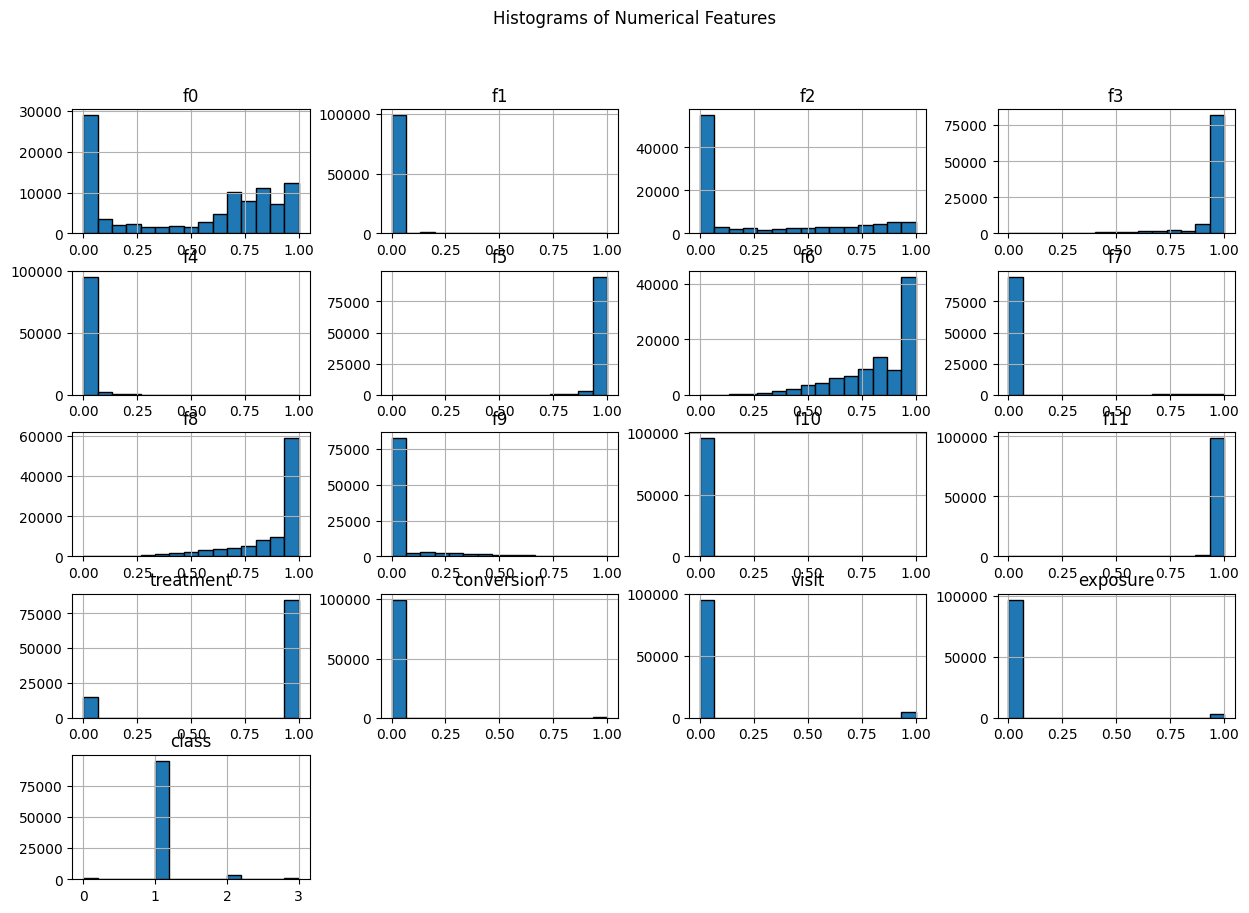

In [ ]:
# Histograms of numerical columns
df_small.hist(bins=15, figsize=(15, 10), edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [ ]:
df_small.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,0.927622,0.000000,0.000000,1.000000,0.0,1.000000,0.938127,0.000000,1.000000,0.000000,0.0,1.0,0,0,0,0,1
1,0.772219,0.000000,0.000000,1.000000,0.0,1.000000,0.894228,0.000000,1.000000,0.000000,0.0,1.0,1,0,0,0,1
2,0.000000,0.000000,0.782171,1.000000,0.0,1.000000,1.000000,0.000000,0.800669,0.000000,0.0,1.0,1,0,0,0,1
3,0.091739,0.169092,0.326328,0.554095,0.0,0.887287,0.448986,0.326423,0.507110,0.549811,0.0,1.0,1,0,1,0,2
4,0.000000,0.000000,0.946792,1.000000,0.0,1.000000,1.000000,0.000000,0.886516,0.000000,0.0,1.0,1,0,0,0,1


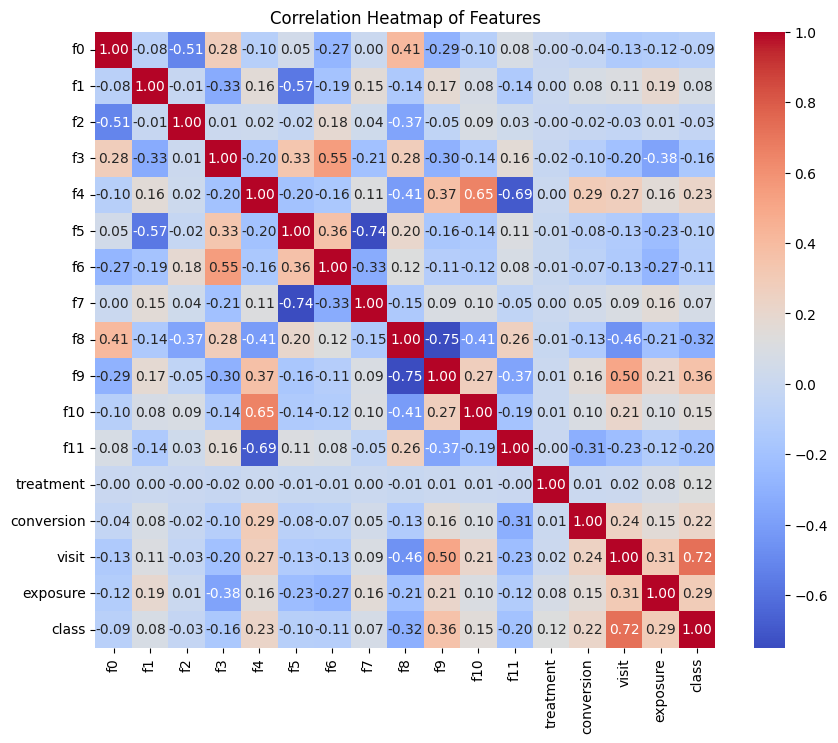

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_small.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


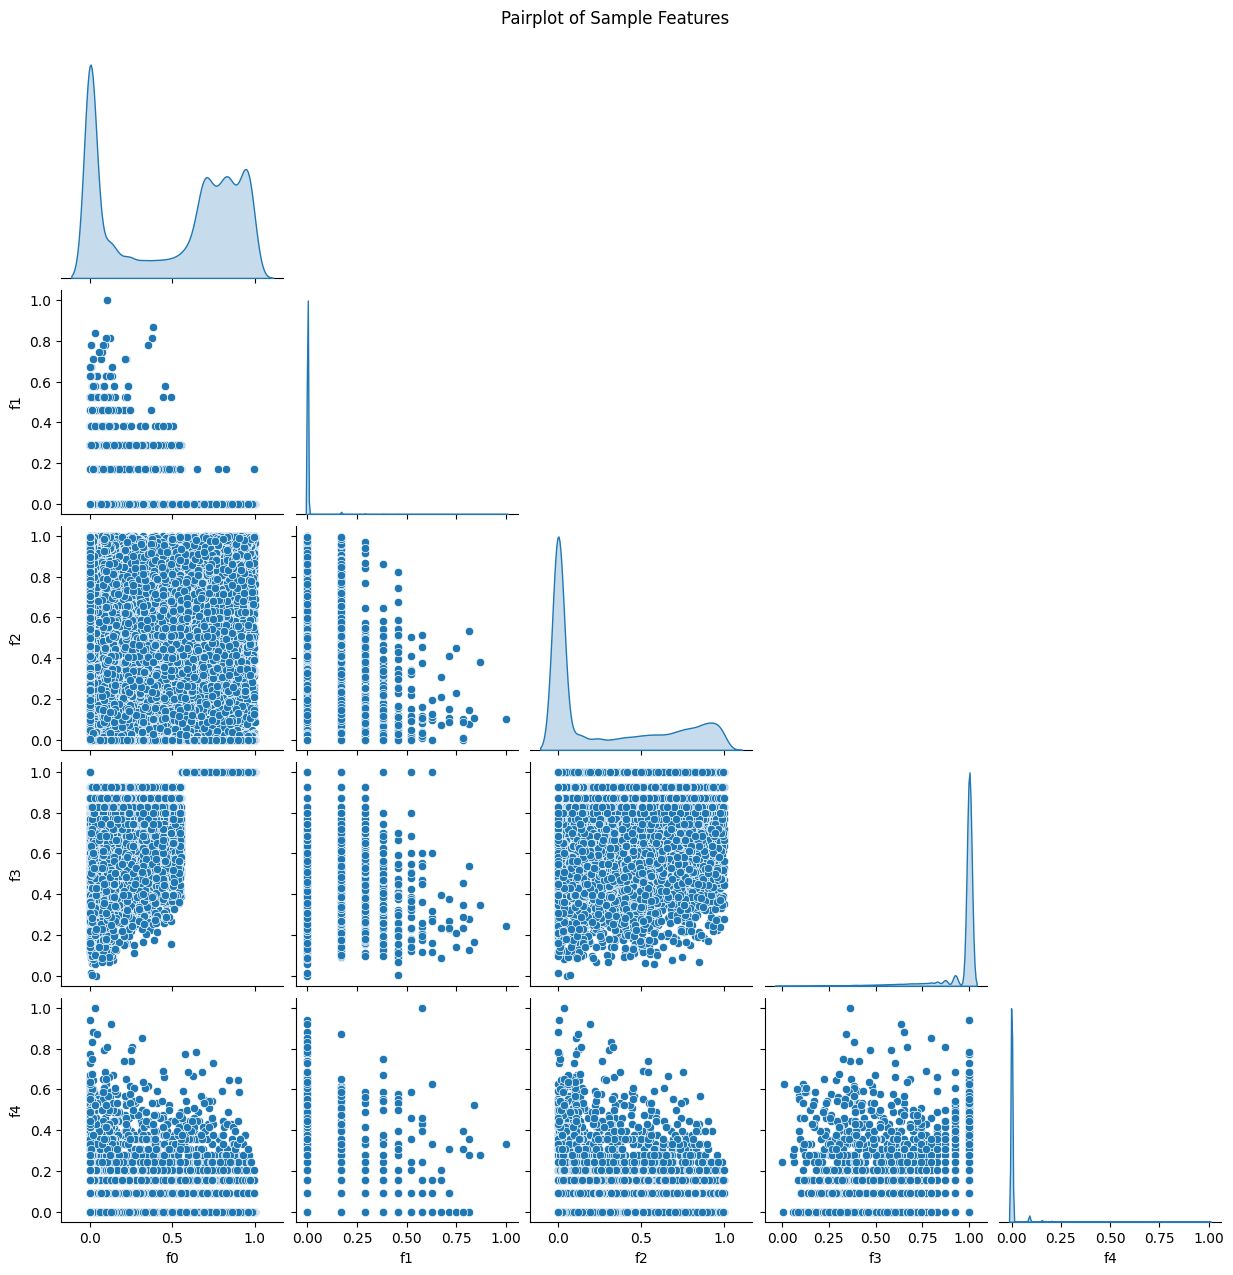

In [ ]:
# Plot pairplot for the first few columns to avoid overcrowding
sns.pairplot(df_small.iloc[:, :5], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Sample Features", y=1.02)
plt.show()


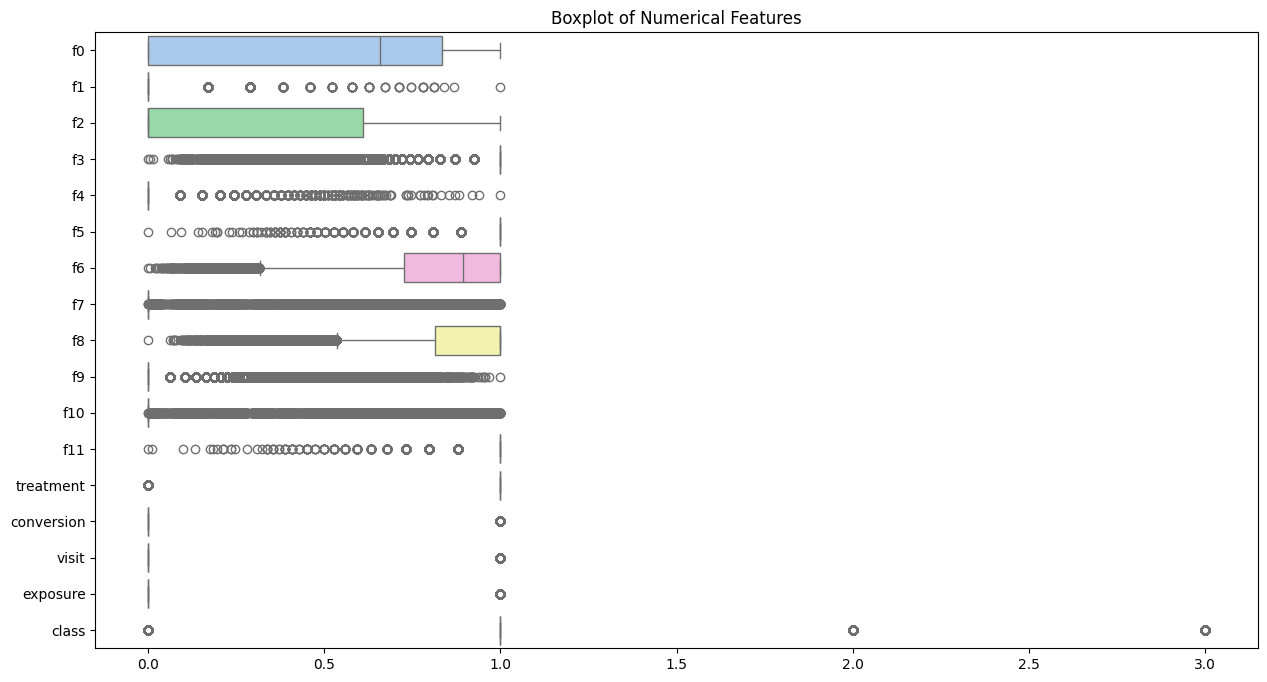

In [ ]:
# Plot boxplots of all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_small, orient="h", palette="pastel")
plt.title("Boxplot of Numerical Features")
plt.show()


In [ ]:
dd= pd.DataFrame(y)

<ipython-input-121-f12fb4b9937a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=dd, palette='viridis')


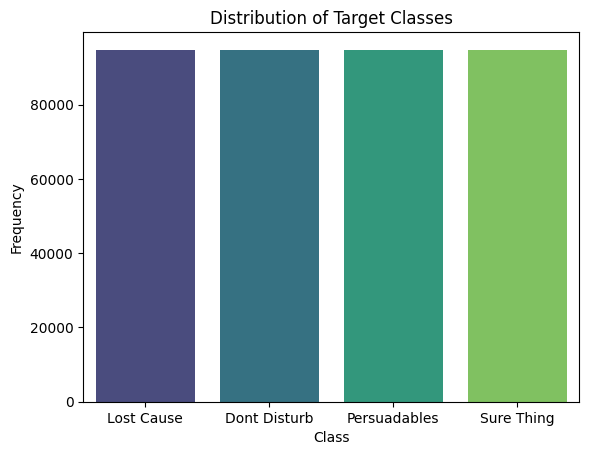

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the class variable is named 'class' or 'target'
# Replace 'class_column' with the actual name of the class column in your dataset
sns.countplot(x='class', data=dd, palette='viridis')

# Set labels and title
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Customize x-axis ticks to show class labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Lost Cause', 'Dont Disturb', 'Persuadables', 'Sure Thing'])

# Show the plot
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)  # X and y are your features and target variable


### Spliting into training and testing samples

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_small.drop('class',axis=1)
y = df_small['class']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)  # X and y are your features and target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# **modell**

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Model Building with Reduced Complexity and Regularization
model = Sequential([
    # First hidden layer with L2 regularization, reduced complexity, and ReLU activation
    Dense(units=8, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Second hidden layer with L2 regularization and ReLU activation
    Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    # Output layer with softmax activation for multi-class classification
    Dense(units=4, activation='softmax')  # Assuming 4 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback to monitor validation loss and stop training if it stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, validation_data=( X_val, y_val),
                    callbacks=[early_stopping], batch_size=32)






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4710 - loss: 1.1403 - val_accuracy: 0.9556 - val_loss: 0.3489
Epoch 2/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7869 - loss: 0.5314 - val_accuracy: 0.9796 - val_loss: 0.2160
Epoch 3/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8602 - loss: 0.4038 - val_accuracy: 0.9798 - val_loss: 0.1631
Epoch 4/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8964 - loss: 0.3432 - val_accuracy: 0.9831 - val_loss: 0.1396
Epoch 5/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9129 - loss: 0.3127 - val_accuracy: 0.9810 - val_loss: 0.1353
Epoch 6/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9216 - loss: 0.2874 - val_accuracy: 0.9831 - val_loss: 0.1301
Epoch 7/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9225 - loss: 0.2849 - val_accuracy: 0.9839 - val_loss: 0.1180
Epoch 8/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9299 - loss: 0.2688 - val_accuracy: 0.

In [ ]:
pred = model.predict(x=X_val)

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
accuracy_score(y_val,pred)

0.9851988899167438

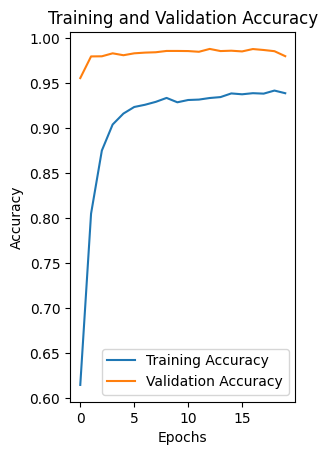

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




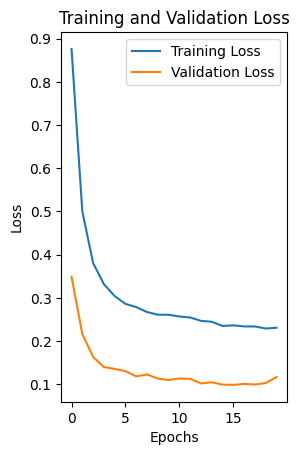

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

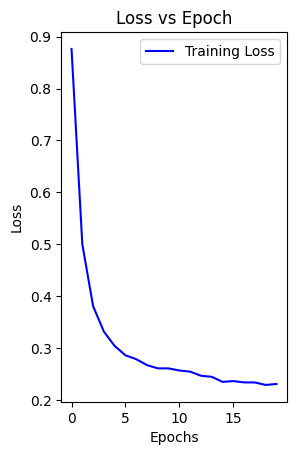

In [ ]:

# Plot Loss vs Epoch (Training Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Predict the classes (choose the class with the highest probability)
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Calculate precision, recall, and f1 score
precision = precision_score(y_val, y_pred_classes, average='weighted')  # For multi-class, use 'weighted'
recall = recall_score(y_val, y_pred_classes, average='weighted')  # For multi-class, use 'weighted'
f1 = f1_score(y_val, y_pred_classes, average='weighted')  # For multi-class, use 'weighted'

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_classes)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Detailed classification report
class_report = classification_report(y_val, y_pred_classes)

# Print all the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9852
Recall: 0.9852
F1-Score: 0.9852
Accuracy: 0.9852
Confusion Matrix:
[[1861    0    0    0]
 [   7 1906    0    0]
 [   0    0 1819   41]
 [   0    0   64 1869]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1861
           1       1.00      1.00      1.00      1913
           2       0.97      0.98      0.97      1860
           3       0.98      0.97      0.97      1933

    accuracy                           0.99      7567
   macro avg       0.99      0.99      0.99      7567
weighted avg       0.99      0.99      0.99      7567



In [ ]:
# Function to plot confusion matrix. Copied from sklearn website
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[1861    0    0    0]
 [   7 1906    0    0]
 [   0    0 1819   41]
 [   0    0   64 1869]]


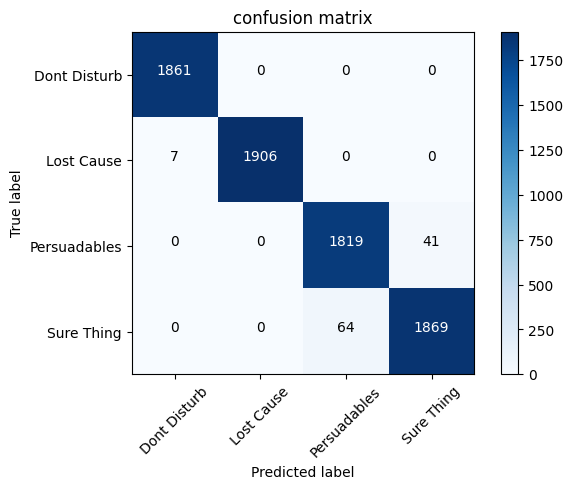

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val,pred),le.classes_)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the confusion matrix
conf_matrix = np.array([[1861, 0, 0, 0],
                        [7, 1906, 0, 0],
                        [0, 0, 1819, 41],
                        [0, 0, 64, 1869]])

# Calculate precision, recall, f1 score for each class
precision = precision_score(conf_matrix.argmax(axis=1), np.arange(conf_matrix.shape[0]), average=None)
recall = recall_score(conf_matrix.argmax(axis=1), np.arange(conf_matrix.shape[0]), average=None)
f1 = f1_score(conf_matrix.argmax(axis=1), np.arange(conf_matrix.shape[0]), average=None)

# Print results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: [1. 1. 1. 1.]
Recall: [1. 1. 1. 1.]
F1 Score: [1. 1. 1. 1.]
